# 数据预处理

In [1]:
import pandas as pd
def quantification(dataPath,outputPath):
    df=pd.read_csv(dataPath)
    x=pd.factorize(df['Geography'])
    y=pd.factorize(df['Gender'])
    df['Geography']=x[0]
    df['Gender']=y[0]
    df.to_csv(outputPath)
quantification("./Churn-Modelling-new.csv","./Churn-Modelling-newT.csv")

In [2]:
import pandas as pd
import numpy as np
def discretization(dataPath,outputPath):
    df=pd.read_csv(dataPath)
    CreditScore=[];Age=[];Balance=[];EstimatedSalary=[];Exited=[]
    # dispersed credit: 0-'low' 1-'middle' 2-'high'
    for i in range(len(df)):
        if df["CreditScore"][i]<584:
            CreditScore.append(0)
        elif df["CreditScore"][i]<718:
            CreditScore.append(1)
        else:
            CreditScore.append(2)
    df["CreditScore"]=CreditScore
    # dispersed age: 0-'teenager' 1-'middle age' 2-'old'
    for i in range(len(df)):
        if df["Age"][i]<=20:
            Age.append(0)
        elif df["Age"][i]<=40:
            Age.append(1)
        else:
            Age.append(2)
    df["Age"]=Age
    #dispersed balance: 0-'low' 1-'middle' 2-'high'
    for i in range(len(df)):
        if df["Balance"][i]<48000:
            Balance.append(0)
        elif df["Balance"][i]<97198:
            Balance.append(1)
        else:
            Balance.append(2)
    df["Balance"]=Balance
    #dispersed EstimatedSalary: 0-'low' 1-'middle' 2-'high'
    for i in range(len(df)):
        if df["EstimatedSalary"][i]<51002:
            EstimatedSalary.append(0)
        elif df["EstimatedSalary"][i]<149388:
            EstimatedSalary.append(1)
        else:
            EstimatedSalary.append(2)
    df["EstimatedSalary"]=EstimatedSalary
    df.to_csv(outputPath)
discretization("./Churn-Modelling-newT.csv","./Churn-Modelling-new-tree.csv")

In [3]:
import pandas as pd
def filtering(dataPath, outputPath):
    df = pd.read_csv(dataPath)
    df_new = pd.DataFrame(
        columns=['Geography', 'EB', 'Age', 'EstimatedSalary', 'NumOfProducts', 'CreditScore', 'Tenure', 'HasCrCard','IsActiveMember', 'Exited', 'Gender'])
    ones = sum(df["Exited"])
    length = len(df["EstimatedSalary"])
    zeros = length - ones
    i = 0
    flag_0 = 0
    flag_1 = 0
    while i != length:
        if df["Exited"][i] == 0 and flag_1 < 1 * ones:
            df_new = df_new.append(pd.DataFrame(
                {'Gender': df["Gender"][i], 'Geography': df["Geography"][i], 'EB': df["EB"][i], 'Age': df["Age"][i],'EstimatedSalary': df["EstimatedSalary"][i], 'NumOfProducts': df["NumOfProducts"][i],'CreditScore': df["CreditScore"][i], 'Tenure': df["Tenure"][i], 'HasCrCard': df["HasCrCard"][i],'IsActiveMember': df["IsActiveMember"][i], 'Exited': df["Exited"][i]}, index=[i]))
            flag_1 = flag_1 + 1

        if df["Exited"][i] == 1 and flag_0 < 1 * zeros:
            df_new = df_new.append(pd.DataFrame(
                {'Gender': df["Gender"][i], 'Geography': df["Geography"][i], 'EB': df["EB"][i], 'Age': df["Age"][i],'EstimatedSalary': df["EstimatedSalary"][i], 'NumOfProducts': df["NumOfProducts"][i],'CreditScore': df["CreditScore"][i], 'Tenure': df["Tenure"][i], 'HasCrCard': df["HasCrCard"][i],'IsActiveMember': df["IsActiveMember"][i], 'Exited': df["Exited"][i]}, index=[i]))
            flag_0 = flag_0 + 1
        i = i + 1
    df_new.to_csv(outputPath)
filtering("./Churn-Modelling-new-tree.csv","./final.csv")

In [4]:
import pandas as pd
import numpy as np

csv=pd.read_csv("./final.csv")
csv_array=np.array(csv)

In [5]:
csv.head()

Unnamed: 0  Geography        EB  Age  EstimatedSalary  NumOfProducts  \
0           0          0  0.000000    2                1              1   
1           1          1  0.744677    2                1              1   
2           2          0  1.401375    2                1              3   
3           3          0  0.000000    1                1              2   
4           4          1  1.587055    2                1              1   

   CreditScore  Tenure  HasCrCard  IsActiveMember  Exited  Gender  
0            1       2          1               1       1       0  
1            1       1          0               1       0       0  
2            0       8          1               0       1       0  
3            1       1          0               0       0       0  
4            2       2          1               1       0       0

# 划分训练集及测试集

In [6]:
import pandas as pd
import numpy as np

csv=pd.read_csv("./final.csv")
csv_array=np.array(csv)

#标签数据为array第11列 Exited
target=csv_array[:,10]
#第1列为编号，对决策树模型无意义，去除，将剩余列作为特征项
feature=csv_array[:,[1,2,3,4,5,6,7,8,9,11]]
#将数据集按4:1分为训练集和测试集
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=10)

In [7]:
#首先使用随机划分的方法将数据集按4:1分为训练集和测试集
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=10)

In [19]:
#设置决策树参数
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=200)

In [20]:
dt_model.fit(feature_train,target_train)
scores = dt_model.score(feature_test,target_test)
scores

0.7889570552147239

In [21]:
predict_results = dt_model.predict(feature_test)#测试集根据决策树的预测结果
predict_results

array([1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1.

In [22]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

image_path = "./images/decision_trees"
os.makedirs(image_path, exist_ok=True)
 
export_graphviz(dt_model,
               out_file=os.path.join(image_path,"bank_tree.dot"),
               feature_names=["Geography","EB","Age","EstimatedSalary","NumOfProducts","CreditScore","Tenure","HasCrCard","IsActiveMember","Gender"],
               class_names=["not exited","exited"],
               rounded=True,
               filled=True)
s=Source.from_file(os.path.join(image_path,"bank_tree.dot"))
s.view()

'./images/decision_trees\\bank_tree.dot.pdf'

# 绘制ROC曲线

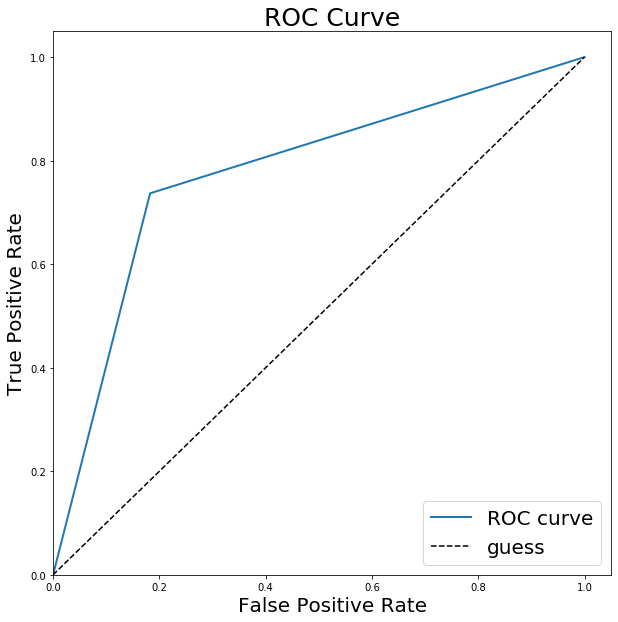

In [14]:
from sklearn.metrics import roc_curve #导入ROC曲线函数
import matplotlib.pyplot as plt #导入作图库
fpr, tpr, thresholds = roc_curve(target_test, predict_results, pos_label=1)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, linewidth=2, label = 'ROC curve') #作出ROC曲线
plt.plot([0,1],[0,1],'k--',label='guess')
plt.title("ROC Curve",fontsize=25)
plt.xlabel('False Positive Rate',fontsize=20) #坐标轴标签
plt.ylabel('True Positive Rate',fontsize=20) #坐标轴标签
plt.ylim(0,1.05) #边界范围
plt.xlim(0,1.05) #边界范围
plt.legend(loc=4,fontsize=20) #图例
plt.show() #显示作图结果

# 混淆矩阵

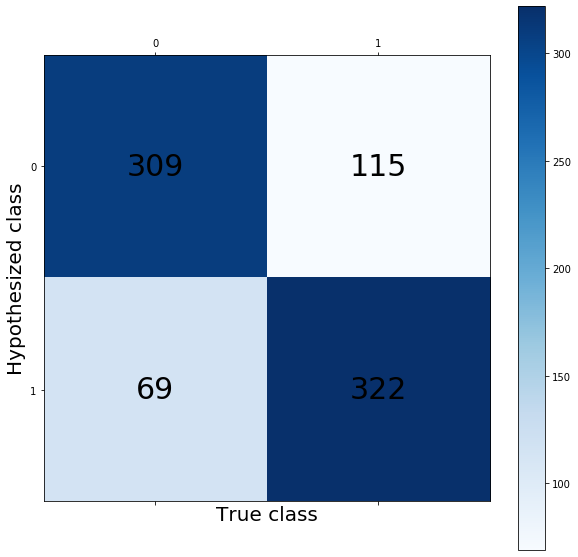

In [53]:
from sklearn.metrics import confusion_matrix #导入混淆矩阵函数
cm = confusion_matrix(target_test, predict_results) #混淆矩阵
import matplotlib.pyplot as plt #导入作图库
plt.figure(figsize=(10, 10))
plt.matshow(cm, fignum=0,cmap=plt.cm.Blues) 
plt.colorbar() #颜色标签
for x in range(len(cm)): #数据标签
    for y in range(len(cm)):
        plt.annotate(cm[x,y], xy=(x, y),fontsize=30, horizontalalignment='center', verticalalignment='center')
  
plt.ylabel('Hypothesized class',fontsize=20) #坐标轴标签
plt.xlabel('True class',fontsize=20) #坐标轴标签
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(target_test, predict_results)

array([[316,  62],
       [104, 333]], dtype=int64)

# 10折交叉验证

In [23]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=10,shuffle=False)

x_axis=[] ; y_axis=[]
k=0;max=0;min=100;sum=0
for train_index,test_index in skfold.split(feature,target):
    k+=1
    skfold_feature_train=feature[train_index]
    skfold_feature_test=feature[test_index]
    skfold_target_train=target[train_index]
    skfold_target_test=target[test_index]
    dt_model.fit(skfold_feature_train,skfold_target_train)
    scores = dt_model.score(skfold_feature_test,skfold_target_test)
    x_axis.append(k)
    y_axis.append(scores)
    if scores>max:
        max=scores
    if scores<min:
        min=scores
    sum+=scores
avg=sum/k

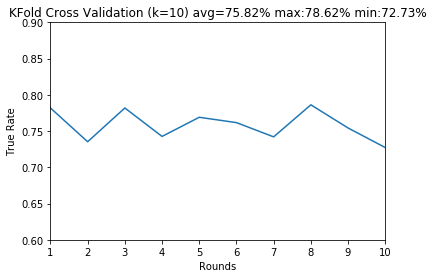

In [24]:
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)
plt.ylim(0.6,0.9)
plt.xlim(1,10)
plt.xlabel("Rounds")
plt.ylabel('True Rate')
plt.title("KFold Cross Validation (k=%s) avg=%s"%(k,round(avg*100,2))+"%"+" max:"+"%s"%(round(max*100,2))+"%"+" min:"+"%s"%(round(min*100,2))+"%")
plt.show()

# 5折交叉验证

In [25]:
from sklearn.model_selection import StratifiedKFold
skfold_5 = StratifiedKFold(n_splits=5,shuffle=False)

x_axis_5=[] ; y_axis_5=[]
k_5=0;max_5=0;min_5=100;sum_5=0
for train_index,test_index in skfold_5.split(feature,target):
    k_5+=1
    skfold_feature_train=feature[train_index]
    skfold_feature_test=feature[test_index]
    skfold_target_train=target[train_index]
    skfold_target_test=target[test_index]
    dt_model.fit(skfold_feature_train,skfold_target_train)
    scores = dt_model.score(skfold_feature_test,skfold_target_test)
    x_axis_5.append(k_5)
    y_axis_5.append(scores)
    if scores>max_5:
        max_5=scores
    if scores<min_5:
        min_5=scores
    sum_5+=scores
avg_5=sum_5/k_5

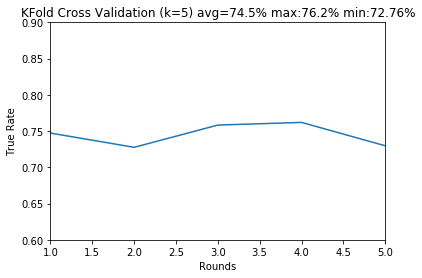

In [26]:
import matplotlib.pyplot as plt
plt.plot(x_axis_5,y_axis_5)
plt.ylim(0.6,0.9)
plt.xlim(1,5)
plt.xlabel("Rounds")
plt.ylabel('True Rate')
plt.title("KFold Cross Validation (k=%s) avg=%s"%(k_5,round(avg_5*100,2))+"%"+" max:"+"%s"%(round(max_5*100,2))+"%"+" min:"+"%s"%(round(min_5*100,2))+"%")
plt.show()

# 15折交叉验证

In [27]:
from sklearn.model_selection import StratifiedKFold
skfold_15 = StratifiedKFold(n_splits=15,shuffle=False)

x_axis=[] ; y_axis=[]
k=0;max=0;min=100;sum=0
for train_index,test_index in skfold_15.split(feature,target):
    k+=1
    skfold_feature_train=feature[train_index]
    skfold_feature_test=feature[test_index]
    skfold_target_train=target[train_index]
    skfold_target_test=target[test_index]
    dt_model.fit(skfold_feature_train,skfold_target_train)
    scores = dt_model.score(skfold_feature_test,skfold_target_test)
    x_axis.append(k)
    y_axis.append(scores)
    if scores>max:
        max=scores
    if scores<min:
        min=scores
    sum+=scores
avg=sum/k

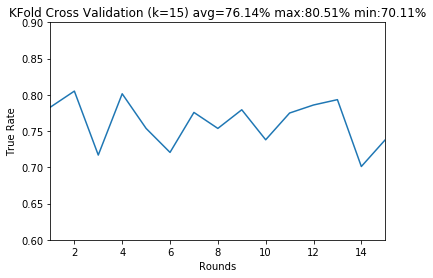

In [28]:
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)
plt.ylim(0.6,0.9)
plt.xlim(1,15)
plt.xlabel("Rounds")
plt.ylabel('True Rate')
plt.title("KFold Cross Validation (k=%s) avg=%s"%(k,round(avg*100,2))+"%"+" max:"+"%s"%(round(max*100,2))+"%"+" min:"+"%s"%(round(min*100,2))+"%")
plt.show()

# 使用SVM进行分类

In [30]:
from sklearn import svm
clf=svm.SVC()
clf.fit(feature_train,target_train)
clf.predict(feature_test)

array([1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1.

In [31]:
scores_svm = clf.score(feature_test,target_test)
scores_svm

0.7042944785276074

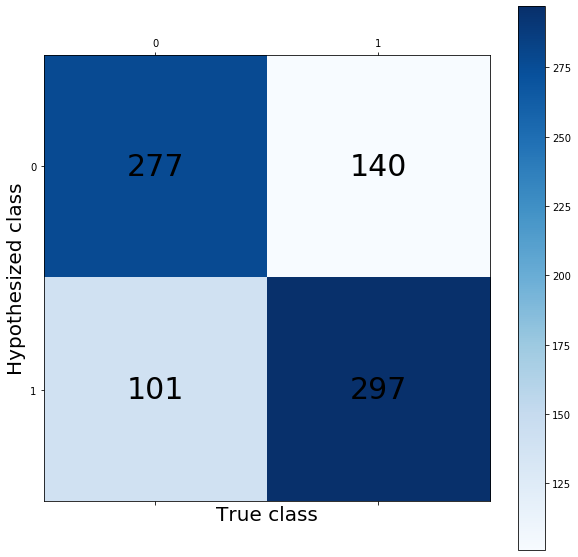

In [32]:
from sklearn.metrics import confusion_matrix #导入混淆矩阵函数
cm = confusion_matrix(target_test, clf.predict(feature_test)) #混淆矩阵
import matplotlib.pyplot as plt #导入作图库
plt.figure(figsize=(10, 10))
plt.matshow(cm, fignum=0,cmap=plt.cm.Blues) 
plt.colorbar() #颜色标签
for x in range(len(cm)): #数据标签
    for y in range(len(cm)):
        plt.annotate(cm[x,y], xy=(x, y),fontsize=30, horizontalalignment='center', verticalalignment='center')
  
plt.ylabel('Hypothesized class',fontsize=20) #坐标轴标签
plt.xlabel('True class',fontsize=20) #坐标轴标签
plt.show()

# 使用神经网络进行分类

In [33]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, 11), random_state=1)
mlp.fit(feature_train,target_train)
mlp.predict(feature_test)
scores_mlp = mlp.score(feature_test,target_test)
scores_mlp

C:\Users\john_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7901840490797546

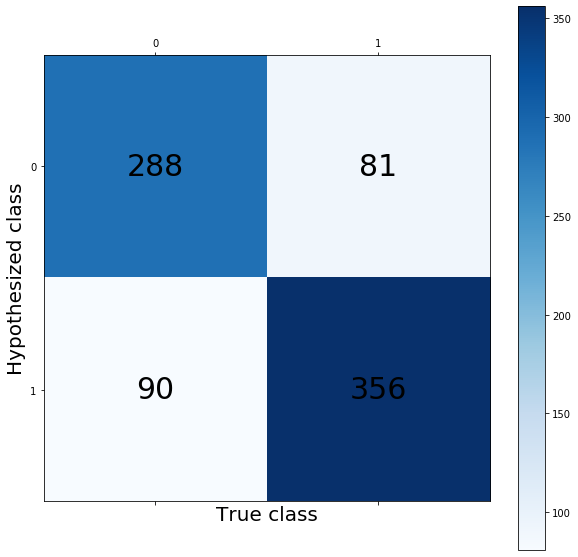

In [34]:
from sklearn.metrics import confusion_matrix #导入混淆矩阵函数
cm = confusion_matrix(target_test, mlp.predict(feature_test)) #混淆矩阵
import matplotlib.pyplot as plt #导入作图库
plt.figure(figsize=(10, 10))
plt.matshow(cm, fignum=0,cmap=plt.cm.Blues) 
plt.colorbar() #颜色标签
for x in range(len(cm)): #数据标签
    for y in range(len(cm)):
        plt.annotate(cm[x,y], xy=(x, y),fontsize=30, horizontalalignment='center', verticalalignment='center')
  
plt.ylabel('Hypothesized class',fontsize=20) #坐标轴标签
plt.xlabel('True class',fontsize=20) #坐标轴标签
plt.show()